In [1]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
# Import required libraries
from diffusers import DiffusionPipeline
from diffusers import StableDiffusionPipeline,EulerAncestralDiscreteScheduler
import torch
from PIL import Image
import IPython.display as display

# Define model paths in a dictionary for easy access
MODEL_PATHS = {
    "stable-diffusion-v1-4": "CompVis/stable-diffusion-v1-4",
    "stable-diffusion-2-1": "stabilityai/stable-diffusion-2-1",
    "dreamlike-diffusion-1.0": "dreamlike-art/dreamlike-diffusion-1.0",
    "stable-diffusion-xl-base-1.0": "stabilityai/stable-diffusion-xl-base-1.0",
    "dreamlike-anime-1.0": "dreamlike-art/dreamlike-anime-1.0"
}


In [8]:
# Function to load a selected model
def load_pipeline(model_name: str):
    """Load a selected Stable Diffusion model pipeline."""
    model_id = MODEL_PATHS.get(model_name)
    if not model_id:
        raise ValueError("Model name not found in the list of available models.")
    if model_id=="stabilityai/stable-diffusion-xl-base-1.0":
        pipe = DiffusionPipeline.from_pretrained(
            model_id,
            torch_dtype=torch.float16,
            use_safetensors=True,
            variant="fp16"
        ).to("cuda")
        print('done')
        return pipe
    else:    
        # Load the model with float16 for efficiency and transfer to CUDA if available
        pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
        pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")
        return pipe


In [4]:
# Function to generate an image from a prompt using a specific model
def generate_image(model_name: str, prompt: str) -> Image.Image:
    """Generate an image given a prompt and selected model."""
    pipeline = load_pipeline(model_name)
    result = pipeline(prompt=prompt)
    del pipeline  # Delete pipeline to free memory
    torch.cuda.empty_cache()  # Clear any leftover cached memory
    torch.cuda.reset_peak_memory_stats()  # Optional: reset CUDA stats
    return result.images[0]


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

done


  0%|          | 0/50 [00:00<?, ?it/s]

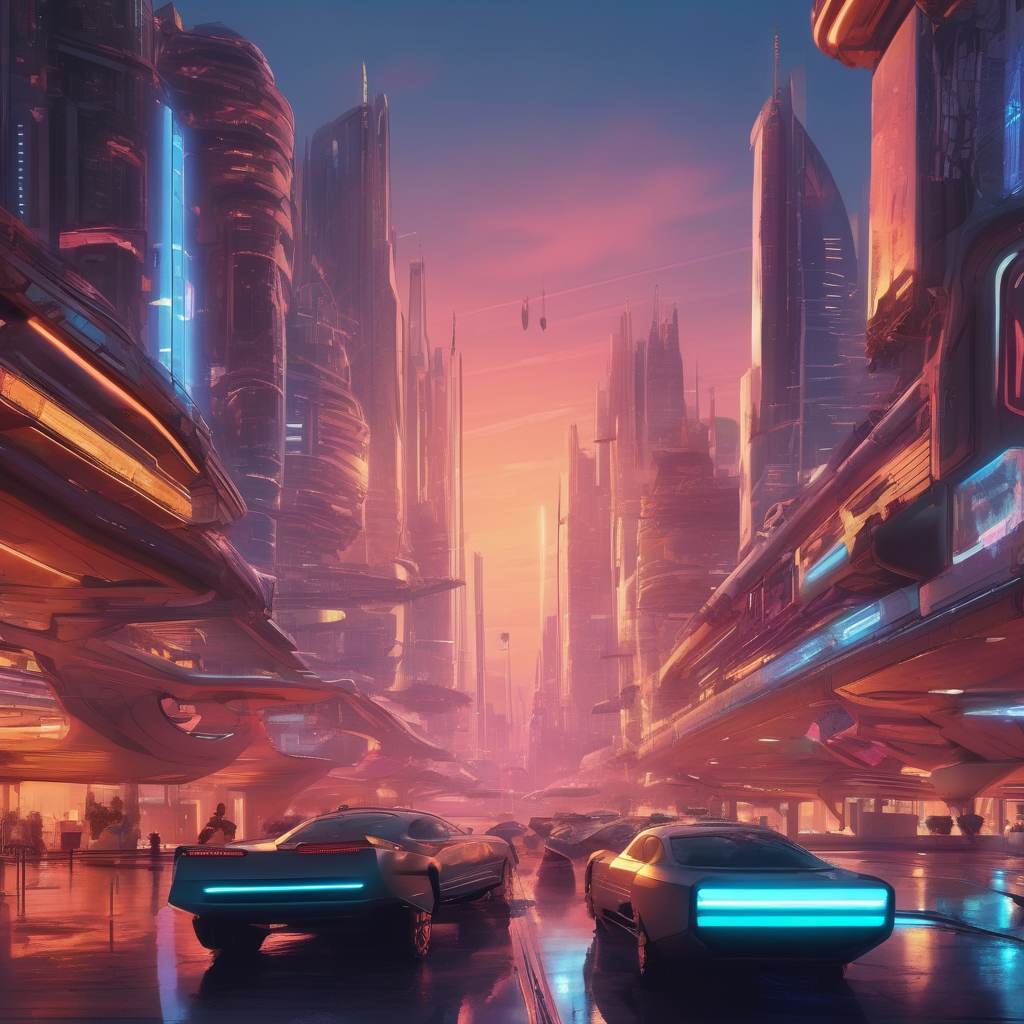

In [9]:
# Sample prompt and model selection
selected_model = "stable-diffusion-xl-base-1.0"  # Choose a model name from MODEL_PATHS keys
prompt = "A futuristic cityscape at sunset with flying cars and neon lights"

# Generate the image
generated_image = generate_image(selected_model, prompt)

# Display the image in the notebook
display.display(generated_image)